# **Assignment 2**


**Q1. Apply the following filtering operation on an input image(Choose your own photo as input) and display both the input and out images**

In [1]:
import cv2
import numpy as np
from PIL import Image,ImageDraw, ImageFilter
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/content/my_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1. Low Pass Filtering

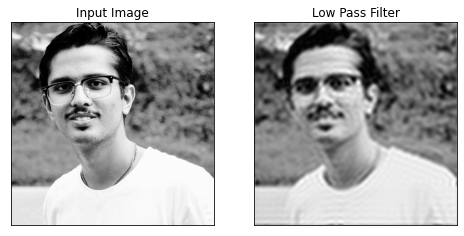

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dft = cv2.dft(np.float32(img_gray),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img_gray.shape
crow,ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2),np.uint8)  
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
fshift = dft_shift*mask 
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.figure(figsize=(8,6))
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

## 2. Sobel Operator, (3x3 & 5x5)


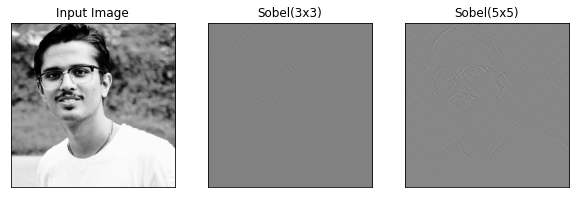

In [4]:
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
new_image1 = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
new_image2 = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(10,6))
plt.subplot(131), plt.imshow(img_gray, cmap='gray'),plt.title('Input Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image1, cmap='gray'),plt.title('Sobel(3x3)')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(new_image2, cmap='gray'),plt.title('Sobel(5x5)')
plt.xticks([]), plt.yticks([])
plt.show()


## 3. Laplacian Operator, (3x3 & 5x5)


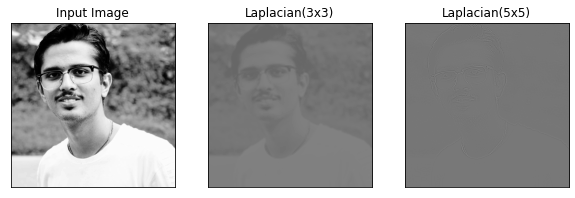

In [5]:
new_image1 = cv2.Laplacian(img_gray,cv2.CV_64F,ksize=3)
new_image2 = cv2.Laplacian(img_gray,cv2.CV_64F,ksize=5)
plt.figure(figsize=(10,6))
plt.subplot(131), plt.imshow(img_gray, cmap='gray'),plt.title('Input Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_gray + new_image1, cmap='gray'),plt.title('Laplacian(3x3)')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_gray + new_image2, cmap='gray'),plt.title('Laplacian(5x5)')
plt.xticks([]), plt.yticks([])
plt.show()

## 4. Laplacian of Gaussian(LOG)

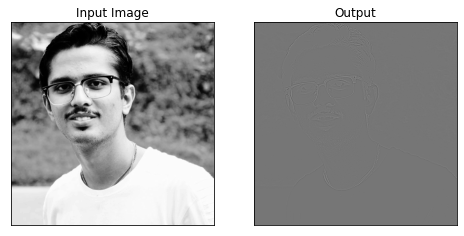

In [6]:
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
new_image = cv2.Laplacian(img_blur,cv2.CV_64F)
new_image = new_image/new_image.max()
plt.figure(figsize=(8,6))
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.show()

## 5. Canny Edge Detection

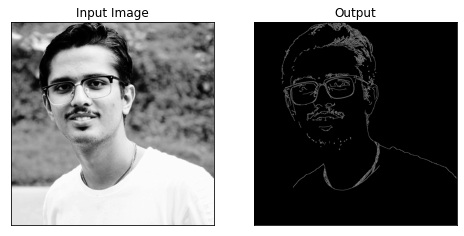

In [7]:
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
plt.figure(figsize=(8,6))
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.show()

## 6. High-boost filtering

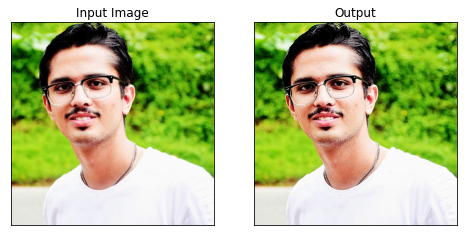

In [8]:
img_blur = cv2.GaussianBlur(img, (7,7), 0)
hboost_image = cv2.addWeighted(img, 3, img_blur, -2, 0)
plt.figure(figsize=(8,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(hboost_image, cmap = 'gray')
plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.show()